In [155]:
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance
from sklearn.cluster import KMeans
import pickle
import numpy as np

In [4]:
with open("clustering.pkl", "rb") as f:
    clustering = pickle.load(f)
X = clustering["X"]
y = clustering["Y"]


In [5]:
metrics = []
MAX_CLUSTERS = 7


In [23]:
for cluster_num in range(1, MAX_CLUSTERS):
    km_models = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroid, label = km_models.cluster_centers_, km_models.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[label==centroid_label],
            centroid[centroid_label, :].reshape(1, -1)
        ).sum(axis=0)[0]
    print("cluster num %d , metric %.4f" %(cluster_num,metric))
    metrics.append(metric)

cluster num 1 , metric 135.9276
cluster num 2 , metric 92.3425
cluster num 3 , metric 74.5232
cluster num 4 , metric 60.7518
cluster num 5 , metric 54.8666
cluster num 6 , metric 49.7458


In [28]:
euclidean_distances(
            X[label==centroid_label],
            centroid[centroid_label, :].reshape(1, -1)
        ).sum(axis=0)[0]

6.771405184137035

In [35]:
metrics[0+1]

92.34245055263457

best num clusters 2


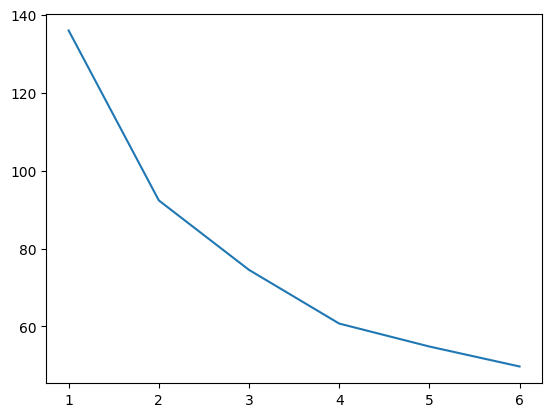

In [45]:
D = []
for i in range (0, len(metrics)-1):
    d = abs(metrics[i+1] - metrics[i])/abs(metrics[i] - metrics[i-1])
    D.append(d)
print("best num clusters %s"%(np.argmin(D)+1))
plt.plot([i+1 for i in range(len(metrics))], metrics)

In [157]:
def random_centroids_selection(X, n, k):
    """Рандомно инициализируем центр кластера"""
    result = []
    for obj_id in np.random.randint(0, n, size=k):
        result.append(X[obj_id, :])
    return result

def eval_weight_evolution(centroid_objects_prev, centroid_objects, k):
    """Вычисляем, как сдвинулись центры за один шаг алгоритма"""
    result = []
    for i in range(k):
        dist = distance.euclidean(
            centroid_objects_prev[i],
            centroid_objects[i]
        )
        result.append(dist)
    return result

def eval_centroids(X, k, cluster_lables):
    """Вычисляем новые центроиды с методом усреднения координат"""
    result = []
    for i in range(k):
        new_centroid = X[cluster_lables==i].mean(axis=0)
        result.append(new_centroid)
    return result
def eval_cluster_lables(X, centroid_objects):
    """Вычисляем метки кластеров"""
    # формируем матрицу (n x k), которая содержит расстояние от каждого объекта до каждого центроида
    cluster_distance = euclidean_distances(X, centroid_objects)
    # находим минимальное расстояние в каждой строчке - это будет кластер объекта
    cluster_lables = cluster_distance.argmin(axis=1)
    return cluster_lables

шаг 0, смещение кластеров: [1.384586909588641, 1.5811513150365168]
шаг 1, смещение кластеров: [0.0704527731729065, 0.06953892993722824]
шаг 2, смещение кластеров: [0.08583566647344554, 0.07955030622457585]
шаг 3, смещение кластеров: [0.0, 0.0]


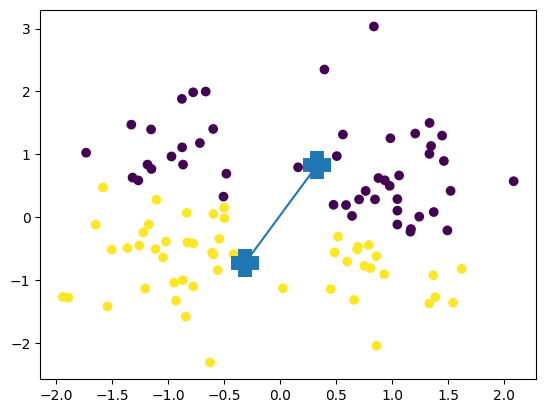

In [225]:
def k_means(X:np.array, k: int=2, eps: float=0.001, num_iteration: int=10) -> np.array:
    """Алгоритм К-средних
    
    :param X: обучающая выборка
    :param k: количество кластеров
    """
    try:
        n, m = X.shape
    except ValueError:
        print("Обучающая выборка должна быть двумерным массивом (n, m) гдк m - размер выборки")
    # инициализируем центроиды случайным элементом выборки
    centroid_objects = random_centroids_selection(X, n, k)
    centroid_objects_prev = [np.zeros(m) for i in range(k)]
    # расстояние между предыдущим и текущим положением каждого центроида
    weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
    step = 0
    # условие остановки: центроиды не изменили своего положения
    # повторяем до выполнения условия остановки
    while sum(weight_evolution[i] > eps for i in range(k))!=0 and step < num_iteration:
        # иначе можно прострелить себе ногу =0
        centroid_objects_prev = centroid_objects.copy()
        # вычисляем метки кластеров
        cluster_lables = eval_cluster_lables(X, centroid_objects)
        # усредняем координаты объектов каждого кластера - это новое положение центроида
        centroid_objects = eval_centroids(X, k, cluster_lables)
        # вычисляем расстояние между центроидами на соседних итерациях
        weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
        print("шаг %s, смещение кластеров: %s" % (step, weight_evolution))
        # обновлённые кластера
        step += 1
    return np.vstack(centroid_objects), cluster_lables
centroids, cluster_labels = k_means(X, k=2, num_iteration=10)

plt.scatter(X[:,0], X[:,1], c=cluster_labels, marker="o", label='data')
plt.plot(centroids[:,0], centroids[:,1], marker="+", mew=10, ms=20)

In [152]:
def random_centroids_selection(X, n, k):
    """Рандомно инициализируем центр кластера"""
    result = []
    for obj_id in np.random.randint(0, n, size=k):
        result.append(X[obj_id, :])
    return result

def eval_weight_evolution(centroid_objects_prev, centroid_objects, k):
    """Вычисляем, как сдвинулись центры за один шаг алгоритма"""
    result = []
    for i in range(k):
        dist = distance.euclidean(
            centroid_objects_prev[i],
            centroid_objects[i]
        )
        result.append(dist)
    return result

def eval_centroids(X, k, cluster_lables):
    """Вычисляем новые центроиды с методом усреднения координат"""
    result = []
    for i in range(k):
        new_centroid = X[cluster_lables==i].mean(axis=0)
        result.append(new_centroid)
    return result

def eval_cluster_lables(X, centroid_objects):
    """Вычисляем метки кластеров"""
    # формируем матрицу (n x k), которая содержит расстояние от каждого объекта до каждого центроида
    cluster_distance = euclidean_distances(X, centroid_objects)
    # находим минимальное расстояние в каждой строчке - это будет кластер объекта
    cluster_lables = cluster_distance.argmin(axis=1)
    return cluster_lables

def k_means(X:np.array, k: int=2, eps: float=0.001, num_iteration: int=10) -> np.array:
    """Алгоритм К-средних
    
    :param X: обучающая выборка
    :param k: количество кластеров
    """
    try:
        n, m = X.shape
    except ValueError:
        print("Обучающая выборка должна быть двумерным массивом (n, m) гдк m - размер выборки")
    # инициализируем центроиды случайным элементом выборки
    centroid_objects = random_centroids_selection(X, n, k)
    centroid_objects_prev = [np.zeros(m) for i in range(k)]
    # расстояние между предыдущим и текущим положением каждого центроида
    weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
    step = 0
    # условие остановки: центроиды не изменили своего положения
    # повторяем до выполнения условия остановки
    while sum(weight_evolution[i] > eps for i in range(k))!=0 and step < num_iteration:
        # иначе можно прострелить себе ногу =0
        centroid_objects_prev = centroid_objects.copy()
        # вычисляем метки кластеров
        cluster_lables = eval_cluster_lables(X, centroid_objects)
        # усредняем координаты объектов каждого кластера - это новое положение центроида
        centroid_objects = eval_centroids(X, k, cluster_lables)
        # вычисляем расстояние между центроидами на соседних итерациях
        weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
        print("шаг %s, смещение кластеров: %s" % (step, weight_evolution))
        # обновлённые кластера
        step += 1
    return np.vstack(centroid_objects), cluster_lables